## Import libraries

In [20]:
#import libraries 
import pandas as pd
from textblob import TextBlob
!pip install wordcloud
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

## Mount Google Drive 

In [21]:
#Start by connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Read the Data 

In [22]:
# making data frame from csv file 
data = pd.read_csv("/content/gdrive/MyDrive/Test/Test.csv") 
data

,Text,Target
0,Prep and attend weeklu call with M Barrett and...,0
1,"Sorting out final amends agreed with Dave, sen...",1


In [23]:
# find max length of narratives
def max_len(x):
    a=x.split()
    return len(a)

max(data['Text'].apply(max_len))

41

In [24]:
# lowercase all the letters 
# this will make sure that "Prep" and "prep" will both be considered as the same word when pre-processing
data["Text"] = data["Text"].str.lower()
data.head()

,Text,Target
0,prep and attend weeklu call with m barrett and...,0
1,"sorting out final amends agreed with dave, sen...",1


## Expanding Abbreviations

In [25]:
# create a key:value dictionary 
# expand abbreviations by replacing it with the expanded form 
abbreviation = { 
    "prep": "prepare",
    " re": " regarding ",
     "re.": "regarding",
    " dili": " diligence ",
    "w/": "with",
    "amends": "amendments",
    "convo": "conversation",
    }

In [26]:
# create a method to replace the keys with their values
def cont_to_exp(x):
    if type(x) is str:
        # remove '\'
        x=x.replace('\\', '')
        for key in abbreviation:
            value=abbreviation[key]
            # replace abbreviation with expanded form
            x= x.replace(key,value)
        return x
    else:
        return x

In [27]:
# expand contracted words in text 
data['Text']=data['Text'].apply(lambda x:cont_to_exp(x))
# print the narratives  
for index,text in enumerate(data["Text"]):
  print('narrative %d:\n'%(index+1),text)

narrative 1:
 prepare and attend weeklu call with m barrett and lc regarding . apple due diligence . send project management spre adsheet to lee caldwell, and liaise with apple regarding  next board meting on 12/12/2022. listen audio regarding cording from last last meeting with mb
narrative 2:
 sorting out final amendments agreed with dave, sending dave, conversation with a howell regarding  project b, advuce given to m&s regarding  deal prepare to meet deadline on 13 oct 2020


## Spellchecking Narratives 

In [28]:
#spellcheck
new = data["Text"].apply(lambda x: str(TextBlob(x).correct()))
print(new)

0    prepare and attend weekly call with m garrett ...
1    sorting out final amendments agreed with dave,...
Name: Text, dtype: object


In [29]:
# print the spellchecked narratives 
for index,text in enumerate(new):
  print('Narrative %d:\n'%(index+1),text)

Narrative 1:
 prepare and attend weekly call with m garrett and ll regarding . apple due diligence . send project management sure sheet to lee caldwell, and liable with apple regarding  next board meeting on 12/12/2022. listen audit regarding cording from last last meeting with mb
Narrative 2:
 sorting out final amendments agreed with dave, sending dave, conversation with a lowell regarding  project b, advice given to m&s regarding  deal prepare to meet deadline on 13 oct 2020


## Save the processed File


In [30]:
# save processed csv file as a new file 
new.to_csv('/content/gdrive/MyDrive/Test/TestProcessed.csv',index=False)

In [31]:
processedData = pd.read_csv('/content/gdrive/MyDrive/Test/TestProcessed.csv')

In [32]:
processedData.shape

(2, 1)

In [33]:
for index,text in enumerate(processedData["Text"]):
  print('Tweet %d:\n'%(index+1),text)

Tweet 1:
 prepare and attend weekly call with m garrett and ll regarding . apple due diligence . send project management sure sheet to lee caldwell, and liable with apple regarding  next board meeting on 12/12/2022. listen audit regarding cording from last last meeting with mb
Tweet 2:
 sorting out final amendments agreed with dave, sending dave, conversation with a lowell regarding  project b, advice given to m&s regarding  deal prepare to meet deadline on 13 oct 2020


## WordCloud

In [34]:
# join the words 
joinnar = ''.join(processedData['Text'].tolist())

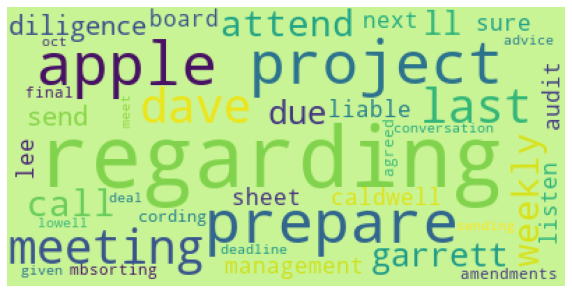

In [35]:
# plot the word cloud 
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(background_color='#C9F495', random_state=10).generate(joinnar)
plot_cloud(wordcloud)